In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
## 데이터 전처리

import pandas as pd
import numpy as np
import sys
import pickle

## 데이터 시각화
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
## 딥러닝 모델링

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib
import os
import warnings
np.set_printoptions(threshold=sys.maxsize)
warnings.filterwarnings(action='ignore')

In [3]:
import itertools

In [4]:
file_path = 'E:/처음/train_data.csv'

In [5]:
df = pd.read_csv(file_path)

In [6]:
df

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2,OUT
0,13,top_in_3,bot_in_24,top_out_8,bot_out_2,-4.3303,11.1340,3.172
1,13,top_in_4,bot_in_30,top_out_47,bot_out_42,-4.3359,10.4282,2.952
2,3,top_in_2,bot_in_18,top_out_39,bot_out_24,10.2006,-3.3653,-2.496
3,25,top_in_2,bot_in_23,top_out_28,bot_out_12,10.0852,-3.3595,-1.396
4,1,top_in_3,bot_in_10,top_out_2,bot_out_1,-4.3219,10.4198,2.928
...,...,...,...,...,...,...,...,...
69928,31,top_in_1,bot_in_3,top_out_4,bot_out_23,-3.4823,9.8031,2.952
69929,31,top_in_2,bot_in_17,top_out_39,bot_out_24,3.0000,-3.3556,-2.774
69930,35,top_in_4,bot_in_26,top_out_47,bot_out_42,-4.3430,10.4235,3.000
69931,31,top_in_2,bot_in_1,top_out_42,bot_out_30,-3.3700,10.3729,-3.224


In [7]:
# MACHINE_NO: 설비 번호입니다. 단, 기본적으로 모든 설비는 동일한 규격을 갖고 있습니다. -> 필요없을듯

# EQUIP1~4: 압축성형에 사용되는 몰드를 나타내는 값입니다. 1개 제품 생산에 상2, 하2로 총 4개의 몰드가 조합됩니다. 
#     아이템 이름에 사용되는 숫자는 단순 인덱스로 몰드의 특성과 관계가 없습니다. 서로 다른 이름의 몰드는 서로 다른 특성을 갖습니다.

# VAL1, VAL2: 몰드 조합과 재료 특성을 통하여 결정되는 몰드의 곡률값입니다.

# OUT: 최종 생산 결과의 특성값으로, 모델은 위의 값들을 입력받아 OUT 열의 값을 예측해야 합니다.
 

In [8]:
print(df.shape)

(69933, 8)


<AxesSubplot:>

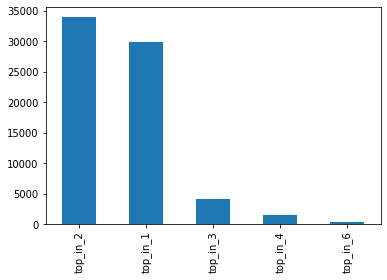

In [9]:
df['EQUIP1'].value_counts().plot.bar()

<AxesSubplot:>

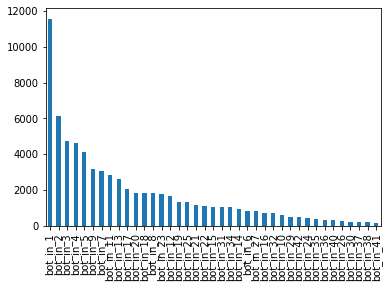

In [10]:
df['EQUIP2'].value_counts().plot.bar()

<AxesSubplot:>

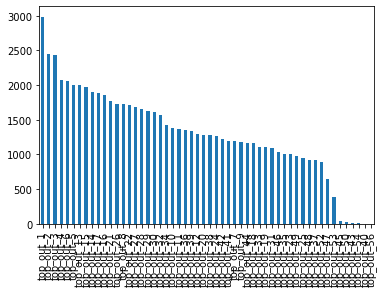

In [11]:
df['EQUIP3'].value_counts().plot.bar()

<AxesSubplot:>

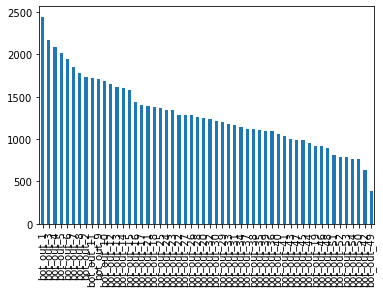

In [12]:
df['EQUIP4'].value_counts().plot.bar()

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69933 entries, 0 to 69932
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MACHINE_NO  69933 non-null  int64  
 1   EQUIP1      69933 non-null  object 
 2   EQUIP2      69933 non-null  object 
 3   EQUIP3      69933 non-null  object 
 4   EQUIP4      69933 non-null  object 
 5   VAL1        69933 non-null  float64
 6   VAL2        69933 non-null  float64
 7   OUT         69933 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.3+ MB
None


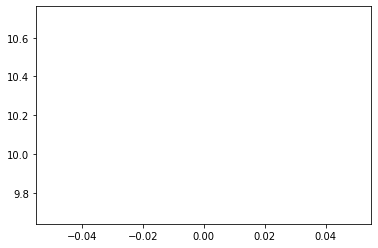

In [29]:
plt.plot(df['VAL1'].iloc[0],'green',label='VAL1')
plt.legend()
plt.show()

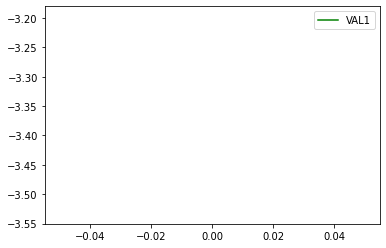

In [30]:
plt.plot(df['VAL2'].iloc[0],'green',label='VAL1')
plt.legend()
plt.show()

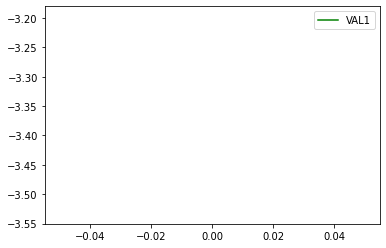

In [32]:
plt.plot(df['VAL2'].iloc[0],'green',label='VAL1')
plt.legend()
plt.show()

In [ ]:
plt.plot(df['VAL2'].iloc[0],'green',label='VAL1')
plt.legend()
plt.show()

In [ ]:
plt.plot(df['VAL2'].iloc[0],'green',label='VAL1')
plt.legend()
plt.show()

In [15]:
df.describe()

,MACHINE_NO,VAL1,VAL2,OUT
count,69933.000000,69933.000000,69933.000000,69933.000000
mean,20.399654,1.393548,5.177607,-0.320425
std,11.213706,6.529686,6.480383,2.223285
min,1.000000,-6.361200,-5.612800,-7.148000
25%,12.000000,-3.485500,-3.357900,-2.024000
50%,21.000000,-3.359000,9.794900,-0.496000
75%,31.000000,9.978600,10.109500,1.500000
max,38.000000,12.257000,13.687200,7.800000


In [16]:
df

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2,OUT
0,13,top_in_3,bot_in_24,top_out_8,bot_out_2,-4.3303,11.1340,3.172
1,13,top_in_4,bot_in_30,top_out_47,bot_out_42,-4.3359,10.4282,2.952
2,3,top_in_2,bot_in_18,top_out_39,bot_out_24,10.2006,-3.3653,-2.496
3,25,top_in_2,bot_in_23,top_out_28,bot_out_12,10.0852,-3.3595,-1.396
4,1,top_in_3,bot_in_10,top_out_2,bot_out_1,-4.3219,10.4198,2.928
...,...,...,...,...,...,...,...,...
69928,31,top_in_1,bot_in_3,top_out_4,bot_out_23,-3.4823,9.8031,2.952
69929,31,top_in_2,bot_in_17,top_out_39,bot_out_24,3.0000,-3.3556,-2.774
69930,35,top_in_4,bot_in_26,top_out_47,bot_out_42,-4.3430,10.4235,3.000
69931,31,top_in_2,bot_in_1,top_out_42,bot_out_30,-3.3700,10.3729,-3.224


In [17]:
df=df[df['EQUIP1']!='top_in_3']
df

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2,OUT
1,13,top_in_4,bot_in_30,top_out_47,bot_out_42,-4.3359,10.4282,2.952
2,3,top_in_2,bot_in_18,top_out_39,bot_out_24,10.2006,-3.3653,-2.496
3,25,top_in_2,bot_in_23,top_out_28,bot_out_12,10.0852,-3.3595,-1.396
5,19,top_in_2,bot_in_1,top_out_41,bot_out_29,-3.3534,10.5780,-4.048
6,19,top_in_1,bot_in_4,top_out_23,bot_out_47,-3.4954,9.7918,1.230
...,...,...,...,...,...,...,...,...
69928,31,top_in_1,bot_in_3,top_out_4,bot_out_23,-3.4823,9.8031,2.952
69929,31,top_in_2,bot_in_17,top_out_39,bot_out_24,3.0000,-3.3556,-2.774
69930,35,top_in_4,bot_in_26,top_out_47,bot_out_42,-4.3430,10.4235,3.000
69931,31,top_in_2,bot_in_1,top_out_42,bot_out_30,-3.3700,10.3729,-3.224


In [18]:
df=df[df['EQUIP1']!='top_in_4']
df

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2,OUT
2,3,top_in_2,bot_in_18,top_out_39,bot_out_24,10.2006,-3.3653,-2.496
3,25,top_in_2,bot_in_23,top_out_28,bot_out_12,10.0852,-3.3595,-1.396
5,19,top_in_2,bot_in_1,top_out_41,bot_out_29,-3.3534,10.5780,-4.048
6,19,top_in_1,bot_in_4,top_out_23,bot_out_47,-3.4954,9.7918,1.230
7,31,top_in_1,bot_in_4,top_out_17,bot_out_51,10.4181,-4.3437,0.702
...,...,...,...,...,...,...,...,...
69926,14,top_in_1,bot_in_2,top_out_10,bot_out_21,-3.4839,10.0022,0.078
69927,3,top_in_2,bot_in_18,top_out_38,bot_out_22,-3.3738,10.3072,-2.548
69928,31,top_in_1,bot_in_3,top_out_4,bot_out_23,-3.4823,9.8031,2.952
69929,31,top_in_2,bot_in_17,top_out_39,bot_out_24,3.0000,-3.3556,-2.774


In [19]:
df=df[df['EQUIP1']!='top_in_6']
df

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2,OUT
2,3,top_in_2,bot_in_18,top_out_39,bot_out_24,10.2006,-3.3653,-2.496
3,25,top_in_2,bot_in_23,top_out_28,bot_out_12,10.0852,-3.3595,-1.396
5,19,top_in_2,bot_in_1,top_out_41,bot_out_29,-3.3534,10.5780,-4.048
6,19,top_in_1,bot_in_4,top_out_23,bot_out_47,-3.4954,9.7918,1.230
7,31,top_in_1,bot_in_4,top_out_17,bot_out_51,10.4181,-4.3437,0.702
...,...,...,...,...,...,...,...,...
69926,14,top_in_1,bot_in_2,top_out_10,bot_out_21,-3.4839,10.0022,0.078
69927,3,top_in_2,bot_in_18,top_out_38,bot_out_22,-3.3738,10.3072,-2.548
69928,31,top_in_1,bot_in_3,top_out_4,bot_out_23,-3.4823,9.8031,2.952
69929,31,top_in_2,bot_in_17,top_out_39,bot_out_24,3.0000,-3.3556,-2.774


In [20]:
# X_in=np.array(list(itertools.chain.from_iterable(df['EQUIP1'])))

# X_in=X_in.reshape(-1,63802)
# # X_in = X_in.T
# X_in.shape

# X_out=np.array(list(itertools.chain.from_iterable(df['EQUIP3'])))

# X_out=X_out.reshape(-1,78011)
# X_out.shape
# # X_out=X_out.T

# X=np.concatenate([X_in,X_out],axis=1)

# Y=np.array(df['OUT'])

# Y=Y.reshape(-1,1)
# Y = Y.T

In [21]:
# data_in_length=[]
# data_out_length=[]

# for i in range(len(df)):
#     temp_in_length=len(df['EQUIP1'].iloc[i])
#     temp_out_length=len(df['EQUIP3'].iloc[i])
#     data_in_length.append(temp_in_length)
#     data_out_length.append(temp_out_length)
    
# df['temp_in_length']=data_in_length
# df['temp_out_length']=data_out_length

In [22]:
# print(set(df['temp_in_length']))

In [23]:
# print(set(df['temp_out_length']))

In [24]:
df

,MACHINE_NO,EQUIP1,EQUIP2,EQUIP3,EQUIP4,VAL1,VAL2,OUT
2,3,top_in_2,bot_in_18,top_out_39,bot_out_24,10.2006,-3.3653,-2.496
3,25,top_in_2,bot_in_23,top_out_28,bot_out_12,10.0852,-3.3595,-1.396
5,19,top_in_2,bot_in_1,top_out_41,bot_out_29,-3.3534,10.5780,-4.048
6,19,top_in_1,bot_in_4,top_out_23,bot_out_47,-3.4954,9.7918,1.230
7,31,top_in_1,bot_in_4,top_out_17,bot_out_51,10.4181,-4.3437,0.702
...,...,...,...,...,...,...,...,...
69926,14,top_in_1,bot_in_2,top_out_10,bot_out_21,-3.4839,10.0022,0.078
69927,3,top_in_2,bot_in_18,top_out_38,bot_out_22,-3.3738,10.3072,-2.548
69928,31,top_in_1,bot_in_3,top_out_4,bot_out_23,-3.4823,9.8031,2.952
69929,31,top_in_2,bot_in_17,top_out_39,bot_out_24,3.0000,-3.3556,-2.774


In [25]:
# X_in=np.array(list(itertools.chain.from_iterable(df['EQUIP1'])))

# X_in=X_in.reshape(-1, 63802)

# X_out=np.array(list(itertools.chain.from_iterable(df['EQUIP3'])))

# X_out=X_out.reshape(-1,78011)
# X_out= del X_out[63802:]

# X=np.concatenate([X_in,X_out],axis=1)

# Y=np.array(df['OUT'])

# Y=Y.reshape(-1,1)

In [26]:
print(len(df['VAL1'])) 

63802


In [27]:
print(len(df['VAL2'])) 

63802


In [28]:
X=np.array(df['VAL1'].iloc[0])

for i in range(0,len(df)):
    X=np.concatenate((X,np.array(df['VAL1'].iloc[i])))

X,Y=X,np.array(df['OUT'])

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
X.shape,Y.shape

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(X_in,Y,test_size=0.3,shuffle=True,random_state=1004)